<a href="https://colab.research.google.com/github/lekhahanumaiah/Marvel-Level-2/blob/main/Image_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

100%|██████████| 9.91M/9.91M [00:01<00:00, 6.04MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 161kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.52MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 6.14MB/s]


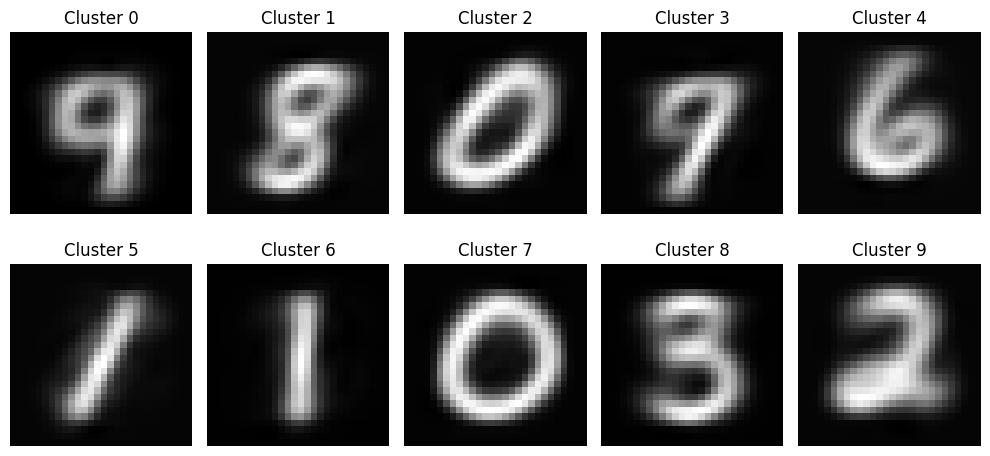

K-Means Clustering completed.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from torchvision import datasets, transforms

# Load MNIST locally using torchvision
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
mnist = datasets.MNIST(root='./data', train=True, transform=transform, download=True)

# Convert to numpy array
data = mnist.data.numpy().reshape(len(mnist.data), -1) / 255.0

# Perform PCA for dimensionality reduction
pca = PCA(n_components=50)
data_reduced = pca.fit_transform(data)

# Apply K-Means Clustering
k = 10
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(data_reduced)

# Visualize cluster centers
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
centroids = pca.inverse_transform(kmeans.cluster_centers_)
centroids = centroids.reshape(10, 28, 28)

for i, ax in enumerate(axes.flat):
    ax.imshow(centroids[i], cmap='gray')
    ax.axis('off')
    ax.set_title(f"Cluster {i}")

plt.tight_layout()
plt.show()

print("K-Means Clustering completed.")
